In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import os
# train 변수 : 문제 가져오기
train = pd.read_csv('data/kaggle/train.csv')
# test 변수 : 정답 가져오기
test = pd.read_csv('data/kaggle/test.csv')


In [25]:
print(train.shape, test.shape)

(29305, 16) (19537, 15)


In [60]:
# 결측치 확인
print(train.isnull().sum())
print(test.isnull().sum())

no                0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
no                0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64


In [61]:
# 정보 확인
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  object
 3   fnlwgt          29305 non-null  int64 
 4   education       29305 non-null  object
 5   education-num   29305 non-null  int64 
 6   marital-status  29305 non-null  object
 7   occupation      29305 non-null  object
 8   relationship    29305 non-null  object
 9   race            29305 non-null  object
 10  sex             29305 non-null  object
 11  capital-gain    29305 non-null  int64 
 12  capital-loss    29305 non-null  int64 
 13  hours-per-week  29305 non-null  int64 
 14  native-country  29305 non-null  object
 15  income          29305 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeI

In [62]:
train['income'].value_counts()

0    22260
1     7045
Name: income, dtype: int64

In [78]:
# all_data로 train + test 세트 합치기 (전처리 동시 진행)
all_data = pd.concat([train, test], sort=False)

In [79]:
all_data['workclass'].value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

<AxesSubplot:xlabel='workclass'>

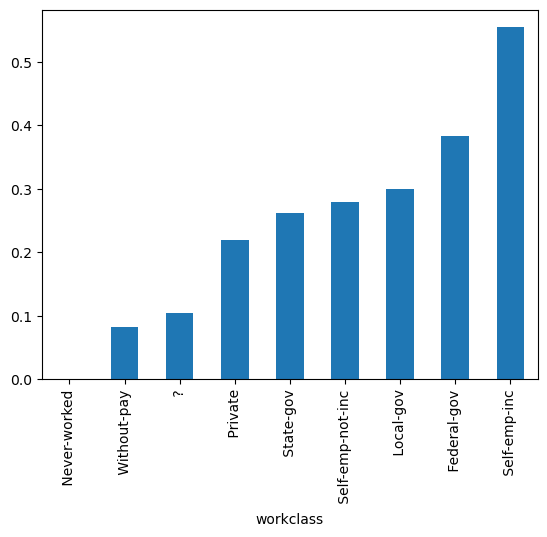

In [65]:
all_data.groupby('workclass')['income'].mean().sort_values().plot(kind='bar')

In [66]:
workclass_other = ['Without-pay', 'Never-worked']
all_data['workclass'] = all_data['workclass'].apply(lambda x: 'Other' if x in workclass_other else x)

In [67]:
all_data['workclass'].value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

C:\Users\smhrd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\smhrd\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\smhrd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\smhrd\anaconda3\lib\site-pack

<AxesSubplot:xlabel='age', ylabel='Density'>

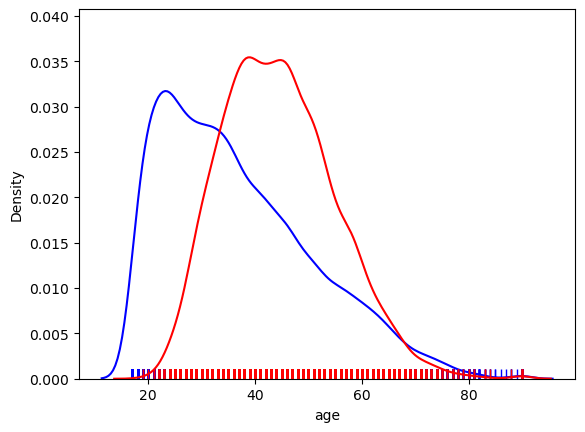

In [68]:
df1 = all_data.loc[all_data['income'] == 0, 'age']
df2 = all_data.loc[all_data['income'] == 1, 'age']

plt.show()
sns.distplot(df1, kde=True, rug=True, hist=False, color='blue')
sns.distplot(df2, kde=True, rug=True, hist=False, color='red')

C:\Users\smhrd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\smhrd\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\smhrd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\smhrd\anaconda3\lib\site-pack

<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

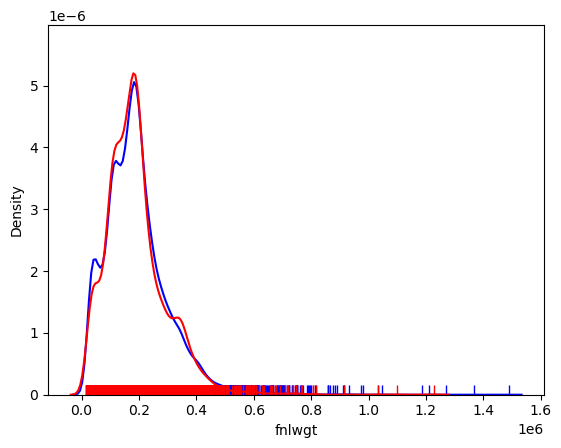

In [41]:
df1 = all_data.loc[all_data['income'] == 0, 'fnlwgt']
df2 = all_data.loc[all_data['income'] == 1, 'fnlwgt']

plt.show()
sns.distplot(df1, kde=True, rug=True, hist=False, color='blue')
sns.distplot(df2, kde=True, rug=True, hist=False, color='red')

C:\Users\smhrd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\smhrd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


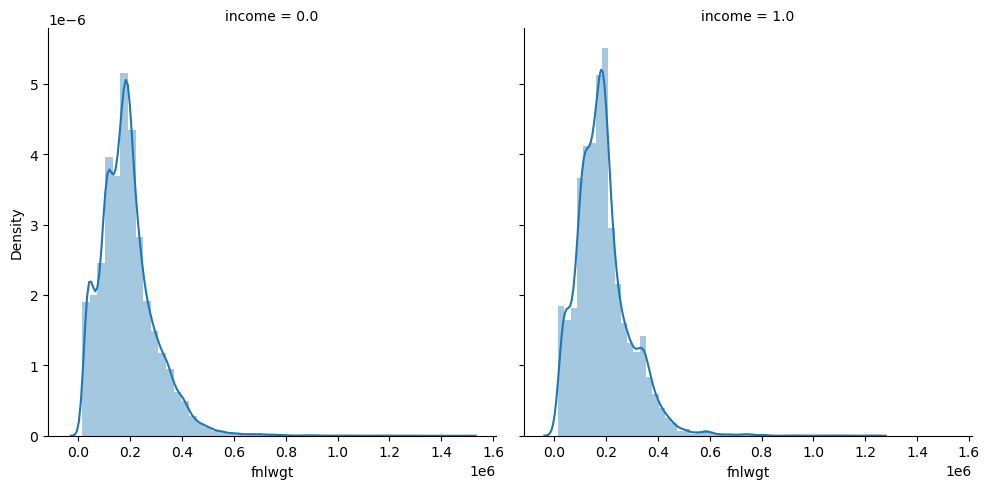

In [42]:
g = sns.FacetGrid(all_data, col="income", height=5)
g.map(sns.distplot, 'fnlwgt')

In [117]:
all_data['fnlwgt_log'] = np.log(all_data['fnlwgt'])

In [118]:
all_data['education'].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

In [70]:
all_data['education-num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: education-num, dtype: int64

In [71]:
all_data.loc[all_data['education'] == 'Preschool', 'income'].sum()

0.0

In [81]:
all_data.groupby(['education'])['income'].agg(['mean', 'count']).sort_values('mean')

,mean,count
education,,
Preschool,0.000000,46
1st-4th,0.013514,148
5th-6th,0.047904,334
10th,0.051471,816
9th,0.053488,430
11th,0.057711,1057
12th,0.065060,415
7th-8th,0.076655,574
HS-grad,0.160042,9435


In [73]:
education_map = {
    'Preschool': 'level_0', 
    '1st-4th': 'level_1', 
    '5th-6th': 'level_1', 
    '7th-8th': 'level_2', 
    '9th': 'level_2', 
    '10th': 'level_3', 
    '11th': 'level_3', 
    '12th': 'level_3', 
    'HS-grad': 'level_4', 
    'Some-college': 'level_5', 
    'Assoc-acdm': 'level_6', 
    'Assoc-voc': 'level_6', 
    'Bachelors': 'level_7', 
    'Masters': 'level_8', 
    'Prof-school': 'level_9', 
    'Doctorate': 'level_9',
}

In [74]:
all_data['education'] = all_data['education'].map(education_map)

In [82]:
all_data['education'].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

In [85]:
all_data = all_data.drop('education-num', axis = 1)

In [86]:
all_data.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [87]:
all_data['marital-status'].value_counts()

 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: marital-status, dtype: int64

In [88]:
all_data.pivot_table(index='marital-status', values='income', aggfunc=['mean', 'count'])#.sort_values('income'

,mean,count
,income,income
marital-status,,
Divorced,0.104467,4030
Married-AF-spouse,0.380952,21
Married-civ-spouse,0.448954,13331
Married-spouse-absent,0.093909,394
Never-married,0.046831,9673
Separated,0.067834,914
Widowed,0.083864,942


In [90]:
all_data.loc[all_data['marital-status'] == 'Married-AF-spouse', 'marital-status'] = 'Married-civ-spouse'

In [91]:
all_data['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

<AxesSubplot:xlabel='occupation'>

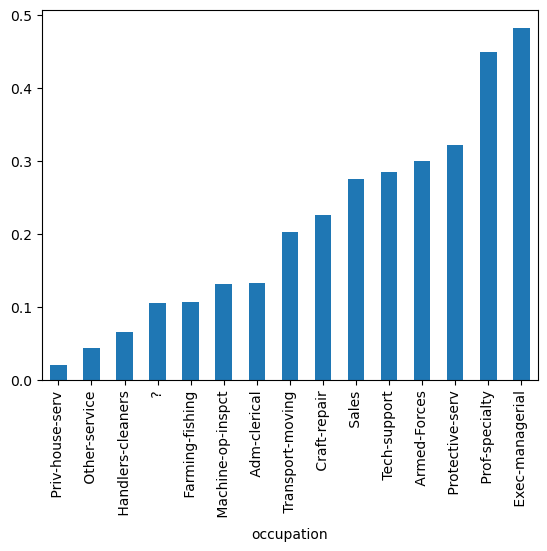

In [92]:
all_data.groupby('occupation')['income'].mean().sort_values().plot(kind='bar')

In [93]:
all_data.loc[train['occupation'].isin(['Priv-house-serv', 'Other-service']), 'income'].value_counts()

Series([], Name: income, dtype: int64)

In [94]:
all_data['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [96]:
all_data['capital-net'] = all_data['capital-gain'] - all_data['capital-loss']
train['capital-net'] = train['capital-gain'] - train['capital-loss']
test['capital-net'] = test['capital-gain'] - test['capital-loss']

C:\Users\smhrd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\smhrd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-net', ylabel='Density'>

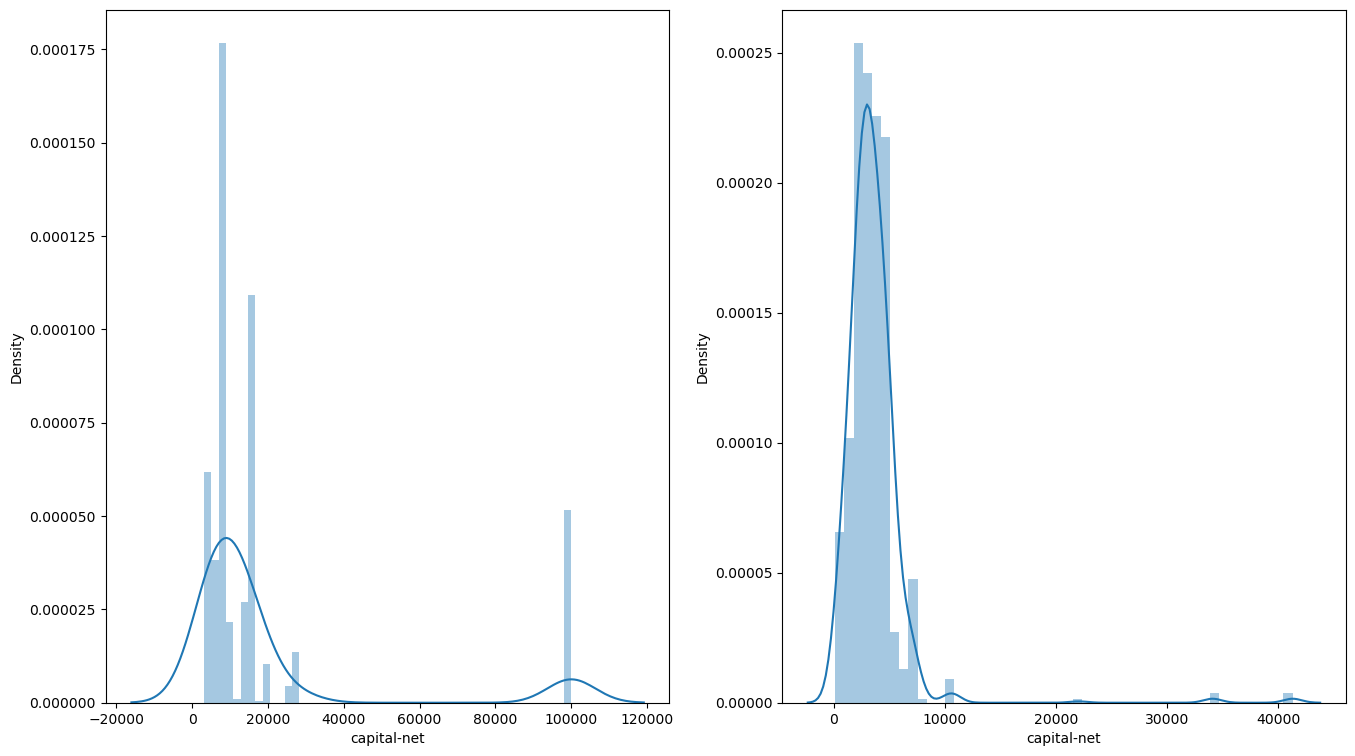

In [99]:
plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
sns.distplot(train.loc[ (train['capital-net'] > 0) & (train['income'] == 1), 'capital-net'])

plt.subplot(1, 2, 2)
sns.distplot(train.loc[ (train['capital-net'] > 0) & (train['income'] == 0), 'capital-net'])

In [101]:
pos_key = all_data.loc[(all_data['income'] == 1) & (all_data['capital-net'] > 0), 'capital-net'].value_counts().sort_index().keys().tolist()
all_key = all_data.loc[(all_data['income'] == 1) & (all_data['capital-net'] > 0), 'capital-net'].value_counts().sort_index().keys().tolist()
all_key.extend(all_data.loc[(all_data['income'] == 0) & (all_data['capital-net'] > 0), 'capital-net'].value_counts().sort_index().keys().tolist())
all_key[:5]

[3103, 4386, 4687, 4787, 4934]

In [104]:
pos_key = all_data.loc[(all_data['income'] == 1) & (all_data['capital-net'] > 0), 'capital-net'].value_counts().sort_index().keys().tolist()
neg_key = all_data.loc[(all_data['income'] == 0) & (all_data['capital-net'] > 0), 'capital-net'].value_counts().sort_index().keys().tolist()

In [105]:
capital_net_pos_key = [key for key in pos_key if key not in neg_key]
capital_net_neg_key = [key for key in neg_key if key not in pos_key]

In [107]:
all_data['capital_net_pos_key'] = all_data['capital-net'].apply(lambda x: x in capital_net_pos_key)
all_data['capital_net_neg_key'] = all_data['capital-net'].apply(lambda x: x in capital_net_neg_key)

In [108]:
all_data.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income',
       'capital-net', 'capital_net_pos_key', 'capital_net_neg_key'],
      dtype='object')

In [119]:
features = [
    'age', 
    'workclass', 
    'fnlwgt_log', 
    'education', 
    'marital-status',
    'occupation',
    'relationship', 
    'race',
    'sex',
    'capital-gain',
    'capital-loss', 
    'hours-per-week',
    'native-country',
    'capital_net_pos_key',
    'capital_net_neg_key',
]

In [120]:
label = [
    'income'
]

In [121]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 19536
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   no                   48842 non-null  int64  
 1   age                  48842 non-null  int64  
 2   workclass            48842 non-null  object 
 3   fnlwgt               48842 non-null  int64  
 4   education            48842 non-null  object 
 5   marital-status       48842 non-null  object 
 6   occupation           48842 non-null  object 
 7   relationship         48842 non-null  object 
 8   race                 48842 non-null  object 
 9   sex                  48842 non-null  object 
 10  capital-gain         48842 non-null  int64  
 11  capital-loss         48842 non-null  int64  
 12  hours-per-week       48842 non-null  int64  
 13  native-country       48842 non-null  object 
 14  income               29305 non-null  float64
 15  capital-net          48842 non-null 

In [122]:
all_data_dummies = pd.get_dummies(all_data[features + label])
all_data_dummies.head()

,age,fnlwgt_log,capital-gain,capital-loss,hours-per-week,capital_net_pos_key,capital_net_neg_key,income,workclass_ ?,workclass_ Federal-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,25,12.297735,0,0,40,False,False,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,39,10.877632,0,1721,55,False,False,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,35,12.190446,0,0,50,False,False,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,64,11.816926,0,0,40,False,False,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,24,11.015065,0,0,70,False,False,1.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [123]:
train_features = all_data_dummies.drop('income', 1).iloc[:len(train)]
test_features = all_data_dummies.drop('income', 1).iloc[len(train):]

C:\Users\smhrd\AppData\Local\Temp\ipykernel_23520\3716931792.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_features = all_data_dummies.drop('income', 1).iloc[:len(train)]
C:\Users\smhrd\AppData\Local\Temp\ipykernel_23520\3716931792.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_features = all_data_dummies.drop('income', 1).iloc[len(train):]


In [124]:
train_label = train[label]

In [125]:
train_features.shape, test_features.shape

((29305, 109), (19537, 109))

In [126]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score, confusion_matrix
from sklearn.metrics import log_loss
from tqdm import tqdm_notebook
import lightgbm as lgbm

In [128]:
x_train, x_valid, y_train, y_valid = train_test_split(train_features, train_label, stratify=train_label, test_size=0.2)

In [130]:
NUM_BOOST_ROUND = 10000
N_SPLITS = 5

lgbm_param = {
    'objective': 'binary',
    'boosting_type':'gbdt',
    'colsample_bytree':1.0,
    'importance_type':'split',
    'learning_rate':0.1,
    'min_child_samples':20,
    'min_child_weight':0.001,
    'min_split_gain':0,
    'n_estimators':10000,
    'num_leaves':40,
    'early_stopping_rounds': 200,
    'reg_alpha':0.6,
    'reg_lambda':0.5,
    'subsample':1.0,
    'subsample_for_bin':200000,
    'subsample_freq':0, 
    'n_jobs':-1, 
}

In [131]:
dtrain = lgbm.Dataset(x_train, y_train)
dvalid = lgbm.Dataset(x_valid, y_valid)

In [132]:
model = lgbm.train(lgbm_param, dtrain, NUM_BOOST_ROUND, 
                   valid_sets=(dtrain, dvalid), 
                   valid_names=('train', 'valid'), 
                   verbose_eval=100,
                  )

C:\Users\smhrd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\smhrd\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 738
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 89
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
Training until validation scores don't improve for 200 rounds
[100]	train's binary_logloss: 0.231628	valid's bina

In [133]:
pred = model.predict(test_features)

In [134]:
# 기본 0.5으로 설정
THRESHOLD = 0.5

print(len(pred[pred >= THRESHOLD]) / len(pred[pred < THRESHOLD]))

0.26191706497868494


In [135]:
pred[pred >= THRESHOLD] = 1
pred[pred < THRESHOLD] = 0

In [136]:
income_pct = train['income'].value_counts()[1] / train['income'].value_counts()[0]
income_pct

0.3164869721473495

In [138]:
rs =  pd.read_csv('./data/kaggle/sample_submission.csv')
rs['income'] = pred # 내 모델의 예측 결과를 양식에 넣기
rs.to_csv('Last.csv', index = False)

In [140]:
from sklearn.metrics import accuracy_score

rs =  pd.read_csv('./data/kaggle/sample_submission.csv')
# 실제 정답 데이터
y_true = rs['income']

# 모델의 예측 결과
y_pred = pred

# 정확도 계산
accuracy = accuracy_score(y_true, y_pred)
print("모델의 정확도:", accuracy)


모델의 정확도: 0.5034037979218918
